In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
import acquire
import prepare
from wordcloud import WordCloud
import nltk.sentiment
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-7e378cf14cb2>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# 1. Spam Data

## a. Load the spam data set.

In [2]:
#acquire data from spam_db

from env import user, password, host

# def get_db_url(database, host=host, user=user, password=password):
#     return f'mysql+pymysql://{user}:{password}@{host}/{database}'


# url = get_db_url("spam_db")
# sql = "SELECT * FROM spam"

# df = pd.read_sql(sql, url, index_col="id")

df = pd.read_csv("spam_clean - spam_clean.csv")

df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [3]:
import prepare
df['cleaned']=df.text.apply(prepare.basic_clean).apply(prepare.tokenize)\
.apply(prepare.remove_stopwords, extra_words=[], 
                                   exclude_words=[])
# df.head()

In [4]:
df['stemmed'] = df.cleaned.apply(prepare.stem)
# df.head()

In [5]:
df['lemmatized']= df.cleaned.apply(prepare.lemmatize)

In [6]:
df.head()

,label,text,cleaned,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine got amore wat,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though


In [7]:
df.label.value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [8]:
df = df.drop(columns=['text','cleaned','stemmed'])
df.head(1)

,label,lemmatized
0,ham,go jurong point crazy available bugis n great world la e buffet cine got amore wat


In [9]:
# def clean(text):
#     '''Simplified text cleaning function'''
#     text = text.lower()
#     text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#     return re.sub(r"[^a-z0-9\s]", '', text)

In [10]:
# combine all messages in single string by label

ham_words = (' '.join(df[df.label == 'ham'].lemmatized))
spam_words = (' '.join(df[df.label == 'spam'].lemmatized))
all_words = (' '.join(df.lemmatized))

In [11]:
ham_words

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah dont think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune im gonna home soon dont want talk stuff anymore tonight k ive cried enough today ive searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh kim watching eh u remember 2 spell name yes v naughty make v wet fine thataos way u feel thataos way gota b seriously spell name ium going try 2 month ha ha joking i_ pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice im really hungry tho suck mark getting worried know im sick turn pizza lol lol always convincing catch bus frying egg make tea eating 

## b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

<AxesSubplot:>

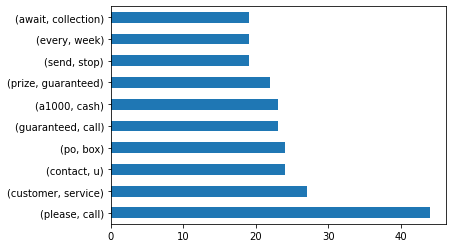

In [12]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()

In [13]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts()
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
spam_bigrams.head(10)

(please, call)         44
(customer, service)    27
(contact, u)           24
(po, box)              24
(guaranteed, call)     23
(a1000, cash)          23
(prize, guaranteed)    22
(send, stop)           19
(every, week)          19
(await, collection)    19
dtype: int64

In [14]:
data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}

In [15]:
len(data)

7036

In [16]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [17]:
for bigram in data:
    print(sia.polarity_scores(bigram))
#     biggy = bigram.split(' ')
#     biggy = ' '.join(biggy)
#     print(biggy)
#     print([' '.join(map(str, l)) for l in biggy])
#     print([lambda l.join(' ') for l in biggy])
    # pd.Series(nltk.bigrams(spam_words.split()))

{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.3182}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.783, 'neu': 0.217, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}
{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.1027}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.2023}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'c

{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.4767}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.222, 'pos': 0.778, 'compound': 0.5423}
{'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'compound': 0.5859}


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'po

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4767}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0,

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.0772}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.571, 'neu': 0.0, 'pos': 0.429, 'compound': -0.128}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.0772}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.217, 'pos': 0.783, 'compound': 0.5574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0

#### Ok good work getting the VADER analysis on each bigram. Now, get it in a DF

In [28]:

# spam_bigrams_df=pd.DataFrame(pd.Series(nltk.bigrams(spam_words.split())),columns=['bigrams'])
spam_bigrams_df=pd.DataFrame(pd.Series(spam_bigrams),columns=['count']).reset_index()


spam_bigrams_df.shape


(7036, 2)

In [33]:
spam_bigrams_df.head(2)

,index,count
0,"(please, call)",44
1,"(customer, service)",27


In [34]:
# from lesson...
# df['sentiment'] = df.text.apply(lambda doc: sia.polarity_scores(doc)['compound'])



spam_bigrams_df['bigram'] = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
spam_bigrams_df.head()

,index,count,bigram
0,"(please, call)",44,please call
1,"(customer, service)",27,customer service
2,"(contact, u)",24,contact u
3,"(po, box)",24,po box
4,"(guaranteed, call)",23,guaranteed call


In [35]:
spam_bigrams_df.bigram.iloc[0]

'please call'

In [36]:
spam_bigrams_df['sentiment'] = spam_bigrams_df.bigram.apply(lambda doc: sia.polarity_scores(doc)['compound'])


# df.bigram.apply(lambda row: sia.polarity_scores(doc))#['compound'])

# df.data.apply \
# (lambda row: [sia.polarity_scores(data) for data in row])

spam_bigrams_df.head()

,index,count,bigram,sentiment
0,"(please, call)",44,please call,0.3182
1,"(customer, service)",27,customer service,0.0000
2,"(contact, u)",24,contact u,0.0000
3,"(po, box)",24,po box,-0.5574
4,"(guaranteed, call)",23,guaranteed call,0.0000


### Great work, got the VADER sentiment analysis for each bigram

In [37]:
spam_bigrams_df = spam_bigrams_df.drop(columns=['index'])
spam_bigrams_df.head()

,count,bigram,sentiment
0,44,please call,0.3182
1,27,customer service,0.0000
2,24,contact u,0.0000
3,24,po box,-0.5574
4,23,guaranteed call,0.0000


In [38]:
spam_bigrams_df.sort_values(by='sentiment')

,count,bigram,sentiment
6237,1,devil detroit,-0.6597
3848,1,jersey devil,-0.6597
5920,1,potential abuse,-0.6369
4160,1,tsunami disaster,-0.6249
6811,1,bitch go,-0.5859
...,...,...,...
5241,1,sunshine congratulation,0.7964
3191,1,love satisfy,0.8020
4959,1,fun great,0.8126
1861,2,win winner,0.8225


In [39]:
spam_bigrams_df.bigram.value_counts()

44 7732584351                    1
phone agent                      1
artist urgent                    1
dogging club                     1
love satisfy                     1
                                ..
2 activate                       1
free 08000938767                 1
get bbdeluxe                     1
wwwldewcom1win150ppmx3age16 u    1
vary win                         1
Name: bigram, Length: 7036, dtype: int64

### my dataframe is messed up, in that it is composed of the value_counts on the bigrams, not handy for further explo.  fixing now...

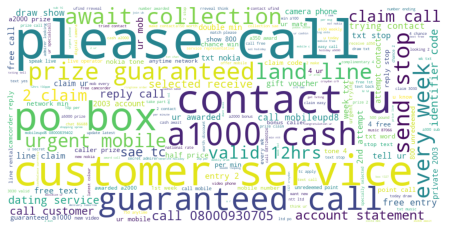

In [40]:
data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

- that’s a dictionary comprehension - kinda like a list comprehension but w/ dictionary keys and values
- the convention is `k` for the key name and `v` for the value that that particular key points to

In [42]:
# this would be to have a look at the ham bigrams
# pd.Series(nltk.bigrams(ham_words.split())).value_counts()#.head(10).plot.barh()

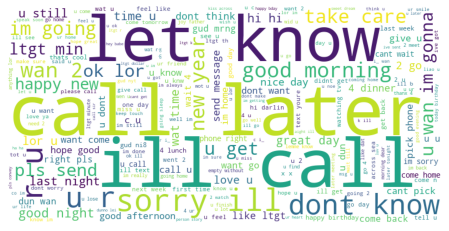

In [43]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts()
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
# ham_bigrams.head()
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

## c. Is there any overlap in the bigrams for the spam data and the ham data?

## d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

Explore the blog articles using the techniques discussed in the exploration lesson.

Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.